# Sample Superstore

# Summary of the Dataset:

This dataset provides information on sales and profitability across various categories and regions within the United States. It includes details such as ship mode, customer segment, product category, sub-category, sales, quantity, discounts, and profit. Here is a brief summary:

- **Ship Mode:** The dataset contains information about different shipping modes, including "Standard Class" and "Second Class," among others.

- **Customer Segment:** It includes data on various customer segments, such as "Consumer," "Corporate," and "Home Office."

- **Category and Sub-Category:** The dataset categorizes products into "Furniture," "Office Supplies," and "Technology," with further sub-categories like "Chairs," "Phones," and "Binders."

- **Sales and Quantity:** Sales figures represent the revenue generated from each transaction, and quantity indicates the number of items sold.

- **Discounts:** Discounts applied to transactions, ranging from 0% to 80%, are included.

- **Profit:** Profit or loss amounts associated with each transaction are provided.

The dataset allows for in-depth analysis of sales performance, profitability, and the impact of factors like discounts, product categories, and customer segments on the company's financial results. Further analysis can yield insights to improve strategies, optimize profitability, and enhance overall business performance.

# **Objective**:


As a business manager, the primary objective of analyzing this dataset is to pinpoint the weak areas within the company's operations where strategic improvements can be made to enhance profitability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data into a DataFrame
df = pd.read_csv('/content/SampleSuperstore.csv')

In [3]:
# View the first 10 rows
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# Summary statistics of numerical columns
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# **EDA**



# **Sales Analysis:**
##We will analyze the total sales across different categories and regions.


In [7]:
## Calculate total sales by category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sales_by_category

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

In [8]:
# Calculate total sales by region
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sales_by_region

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

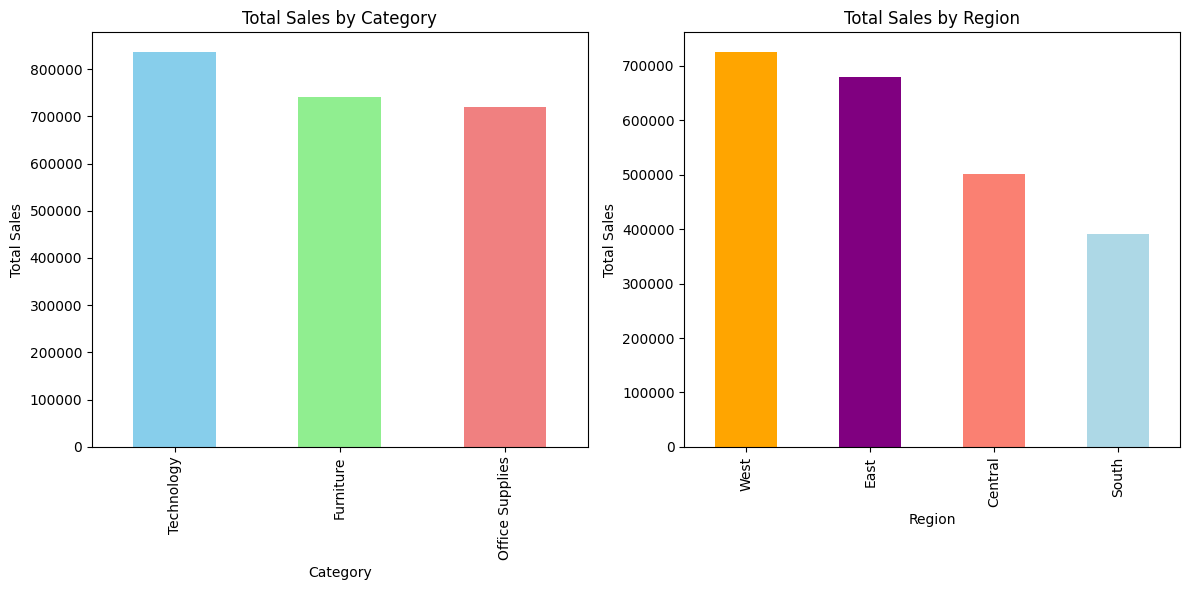

In [9]:
# Define custom colors for the bars
category_colors = ['skyblue', 'lightgreen', 'lightcoral']
region_colors = ['orange', 'purple', 'salmon', 'lightblue']

# Visualize sales by category with custom colors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sales_by_category.plot(kind='bar', title='Total Sales by Category', color=category_colors)
plt.xlabel('Category')
plt.ylabel('Total Sales')

# Visualize sales by region with custom colors
plt.subplot(1, 2, 2)
sales_by_region.plot(kind='bar', title='Total Sales by Region', color=region_colors)
plt.xlabel('Region')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

The "Technology" category generated the highest total sales of approximately $836,154.03.
"West" region recorded the highest total sales.


**Advantages for the Company:**


**Profitable Product Category**: The strong performance of the "Technology" category indicates that the company can focus on expanding its product offerings in this category to increase revenue.

**Regional Growth Potential**: The "West" region stands out as a lucrative market with the highest sales. The company can invest more resources and marketing efforts in this region to further capitalize on its potential.

**Strategic Insights**: This analysis provides data-driven insights that can guide the company's strategic decisions, helping allocate resources effectively and optimize sales and profitability.

**Competitive Edge**: By understanding which product categories and regions are performing well, the company can gain a competitive edge by tailoring its business strategies to capitalize on these strengths.

 **Overall, this analysis empowers the company to make informed decisions that can lead to increased sales and profitability while leveraging its strengths in the "Technology" category and the "West" region.**

# **Profit Analysis:**

## Next, we will analyze the total profit across different categories and regions.

In [10]:
# Calculate total profit by category
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
profit_by_category

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

In [11]:
# Calculate total profit by region
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
profit_by_region

Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

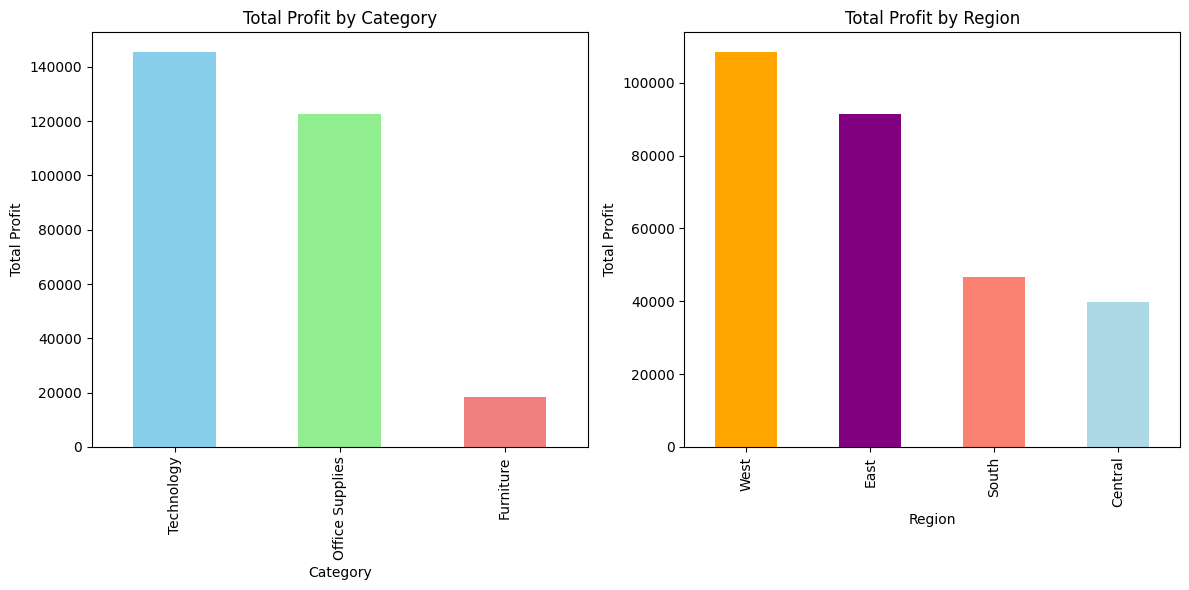

In [12]:
# Define custom colors for the bars
category_colors = ['skyblue', 'lightgreen', 'lightcoral']
region_colors = ['orange', 'purple', 'salmon', 'lightblue']

# Visualize profit by category with custom colors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
profit_by_category.plot(kind='bar', title='Total Profit by Category', color=category_colors)
plt.xlabel('Category')
plt.ylabel('Total Profit')

# Visualize profit by region with custom colors
plt.subplot(1, 2, 2)
profit_by_region.plot(kind='bar', title='Total Profit by Region', color=region_colors)
plt.xlabel('Region')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

- The "Technology" category has the highest total profit, amounting to approximately $145,454.95, followed by "Office Supplies" with approximately $122,490.80 in total profit and "Furniture" with around $18,451.27 in total profit.
- In terms of regions, the "West" region leads in total profit, with approximately $108,418.45, followed by the "East" region with about $91,522.78, the "South" region with approximately $46,749.43, and the "Central" region with around $39,706.36.

**Advantages for the Company:**
1. **Profitable Product Categories:** The analysis highlights that the "Technology" category is the most profitable for the company. This insight can guide the company to allocate more resources and marketing efforts to further enhance profitability in this category.

2. **Regional Profitability:** The "West" region emerges as the most profitable region, indicating a strong market presence. The company can strategically focus on expanding and consolidating its operations in this region to maximize profits.

3. **Strategic Decision-Making:** This analysis offers valuable data-driven insights that can inform the company's strategic decisions. By concentrating efforts on the most profitable categories and regions, the company can enhance overall profitability.

4. **Competitive Positioning:** Understanding which product categories and regions drive higher profits enables the company to position itself competitively. It can tailor pricing, marketing, and product offerings to maintain and strengthen its profitability.

**In summary, this analysis provides the company with a clear understanding of which product categories and regions are most profitable. Armed with this knowledge, the company can make informed decisions to optimize its operations and achieve greater profitability, ultimately contributing to its success and competitiveness in the market.**

# **Discount Analysis**

In [13]:
# Calculate average profit based on discounts
discount_vs_profit = df.groupby('Discount')['Profit'].mean()
discount_vs_profit

Discount
0.00     66.900292
0.10     96.055074
0.15     27.288298
0.20     24.702572
0.30    -45.679636
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
0.70    -95.874060
0.80   -101.796797
Name: Profit, dtype: float64

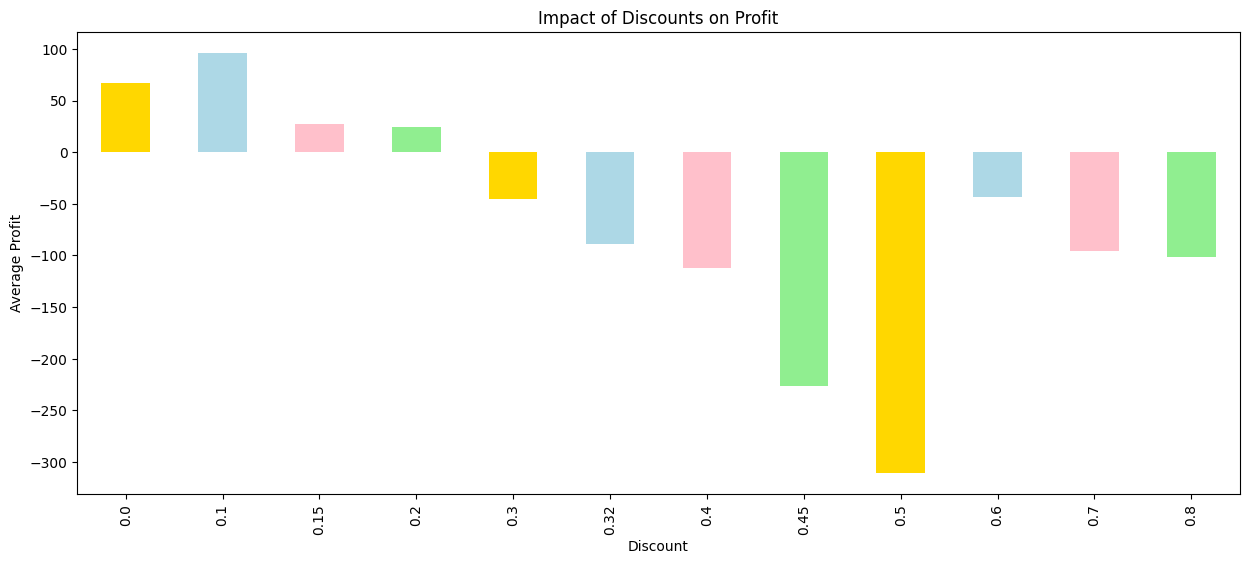

In [14]:
# Define custom colors for the bars
discount_colors = ['gold', 'lightblue', 'pink', 'lightgreen']

# Visualize the impact of discounts on profit with custom colors
plt.figure(figsize=(15, 6))
discount_vs_profit.plot(kind='bar', title='Impact of Discounts on Profit', color=discount_colors)
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.show()

**Discount Analysis:**

- The analysis examines the impact of discounts on average profit margins. Different discount levels, ranging from 0% to 80%, were considered.

**Key Findings in Simple Language:**

1. **Positive Impact at Low Discounts:** For small discounts, such as 10% and 15%, the company experienced an increase in average profit. This means that offering these modest discounts resulted in higher profits per sale.

2. **Diminishing Returns at Higher Discounts:** As discounts increased beyond 20%, the average profit margin started to decrease. Discounts of 30% and higher had a significantly negative impact on profit, resulting in losses per sale.

3. **Largest Profit Erosion at 50% and 60% Discounts:** The most substantial profit erosion occurred with discounts of 50% and 60%. These deep discounts resulted in significant losses for the company on average per sale.

4. **Extreme Losses at 45%, 70%, and 80% Discounts:** Discounts of 45%, 70%, and 80% had the most detrimental effect on profit margins, causing the company to experience substantial losses on average for each sale.

**Implications for the Company:**

The company should carefully consider its discounting strategy. While offering modest discounts can boost profits, excessively deep discounts can erode profits and lead to losses. It's essential to strike a balance between attracting customers with discounts and maintaining healthy profit margins. Additionally, the company should monitor and analyze the impact of discounts regularly to make informed pricing decisions.

# Analysis of Shipping Modes:

In [15]:
# Calculate total sales and profit by shipping mode
sales_by_ship_mode = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
sales_by_ship_mode

Ship Mode
Standard Class    1.358216e+06
Second Class      4.591936e+05
First Class       3.514284e+05
Same Day          1.283631e+05
Name: Sales, dtype: float64

In [16]:
# Format the values to have commas and two decimal places
sales_by_ship_mode_formatted = sales_by_ship_mode.map('{:,.2f}'.format)
sales_by_ship_mode_formatted

Ship Mode
Standard Class    1,358,215.74
Second Class        459,193.57
First Class         351,428.42
Same Day            128,363.12
Name: Sales, dtype: object

In [17]:
profit_by_ship_mode = df.groupby('Ship Mode')['Profit'].sum().sort_values(ascending=False)
profit_by_ship_mode

Ship Mode
Standard Class    164088.7875
Second Class       57446.6354
First Class        48969.8399
Same Day           15891.7589
Name: Profit, dtype: float64

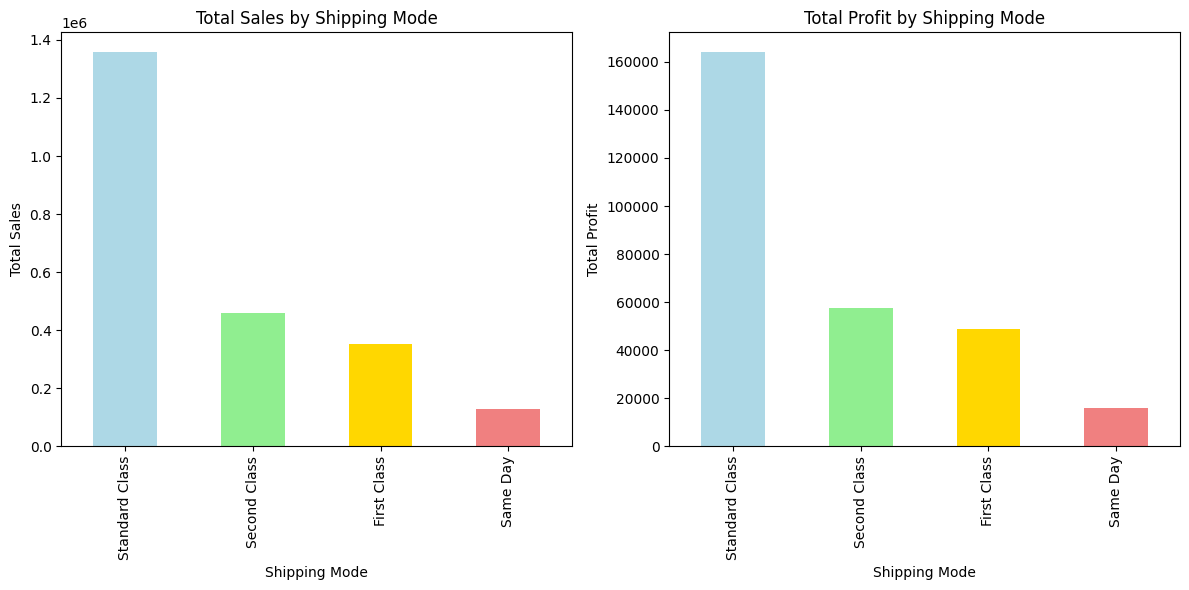

In [18]:
# Define custom colors for the bars
ship_mode_colors = ['lightblue', 'lightgreen', 'gold', 'lightcoral']

# Visualize total sales by shipping mode
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sales_by_ship_mode.plot(kind='bar', title='Total Sales by Shipping Mode', color=ship_mode_colors)
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')

# Visualize total profit by shipping mode
plt.subplot(1, 2, 2)
profit_by_ship_mode.plot(kind='bar', title='Total Profit by Shipping Mode', color=ship_mode_colors)
plt.xlabel('Shipping Mode')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()


The provided results show the total sales and total profit by different shipping modes. Below are the figures for both sales and profit:

**Total Sales by Shipping Mode:**
- Standard Class: $1,358,216.00
- Second Class: $459,193.60
- First Class: $351,428.40
- Same Day: $128,363.10

**Total Profit by Shipping Mode:**
- Standard Class: $164,088.79
- Second Class: $57,446.64
- First Class: $48,969.84
- Same Day: $15,891.76

**How it Helps the Business:**

1. **Understanding Sales Contribution:** The analysis provides insights into the contribution of different shipping modes to total sales. "Standard Class" shipping is the highest revenue generator, contributing significantly to the company's overall sales.

2. **Profitability Assessment:** Examining profit by shipping mode reveals that "Standard Class" is not only the highest in sales but also in profit. This indicates that the company's most commonly used shipping mode is not only popular but also profitable.

3. **Resource Allocation:** The company can use this information to allocate resources effectively. For example, it might choose to invest more in marketing and optimizing services related to "Standard Class" shipping to further boost sales and profit.

4. **Pricing and Strategy:** The data can guide pricing and strategy decisions. If a particular shipping mode is less profitable, the company might consider adjusting pricing or improving efficiency to enhance profitability.

5. **Customer Experience:** Analyzing the popularity of different shipping modes can help the company tailor its customer experience. It can focus on ensuring that the most popular shipping modes offer a seamless and efficient experience to maintain customer satisfaction and loyalty.

**In summary, the analysis of sales and profit by shipping mode allows the company to identify areas of strength and potential for improvement in its shipping and delivery services. It provides valuable insights to make data-driven decisions and enhance overall performance and profitability.**

# Analysis of Customer Segments

In [19]:
# Calculate total sales and profit by customer segment
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
sales_by_segment

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

In [20]:
profit_by_segment = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
profit_by_segment

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

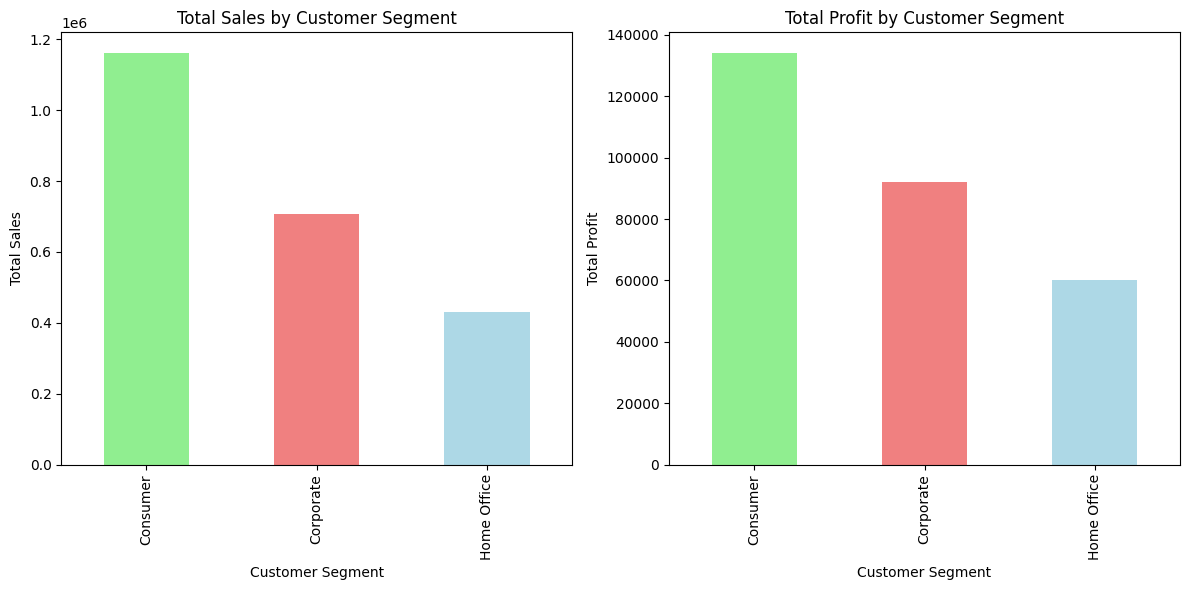

In [21]:
# Define custom colors for the bars
segment_colors = ['lightgreen', 'lightcoral', 'lightblue']

# Visualize total sales by customer segment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sales_by_segment.plot(kind='bar', title='Total Sales by Customer Segment', color=segment_colors)
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')

# Visualize total profit by customer segment
plt.subplot(1, 2, 2)
profit_by_segment.plot(kind='bar', title='Total Profit by Customer Segment', color=segment_colors)
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()


The provided results show the total sales and total profit by different customer segments. Below are the figures for both sales and profit:

**Total Sales by Customer Segment:**
- Consumer: $1,161,401.00
- Corporate: $706,146.40
- Home Office: $429,653.10

**Total Profit by Customer Segment:**
- Consumer: $134,119.21
- Corporate: $91,979.13
- Home Office: $60,298.68

**How it is Helpful to the Business:**

1. **Understanding Customer Segmentation:** The analysis provides insights into the contribution of different customer segments to total sales. "Consumer" segment is the highest revenue generator, contributing significantly to the company's overall sales.

2. **Profitability Assessment:** Examining profit by customer segment reveals that "Consumer" is not only the highest in sales but also in profit. This indicates that the company's consumer-focused strategies are not only popular but also profitable.

3. **Resource Allocation:** The company can use this information to allocate resources effectively. For example, it might choose to invest more in marketing and optimizing services for the "Consumer" segment to further boost sales and profit.

4. **Targeted Marketing:** Knowing which customer segments are most profitable allows for targeted marketing efforts. The company can tailor its marketing campaigns and promotions to appeal to the "Consumer" segment.

5. **Customer Experience:** Analyzing customer segments helps in tailoring the customer experience. The company can focus on ensuring that the most popular segments, like "Consumer," receive excellent service and personalized attention to maintain customer satisfaction and loyalty.

6. **Growth Strategies:** The data can guide the company in developing growth strategies. For instance, it might consider expanding its product offerings or services to further engage with the lucrative "Consumer" segment.

**In summary, the analysis of sales and profit by customer segment allows the company to identify its most valuable customer segments and areas where it can drive growth and profitability. It provides valuable insights to make data-driven decisions and enhance overall performance and customer relationships.**

# Relationship Between Sales and Profit:

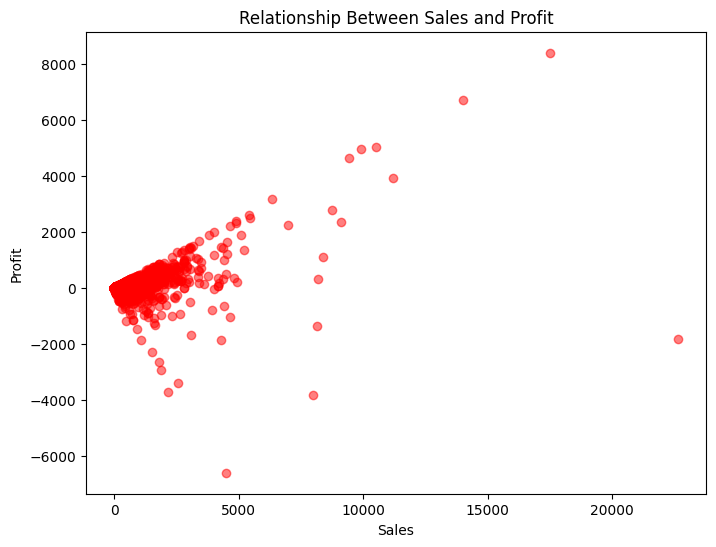

In [22]:
# Scatter plot to visualize the relationship between sales and profit
plt.figure(figsize=(8, 6))
plt.scatter(df['Sales'], df['Profit'], alpha=0.5, color='Red')
plt.title('Relationship Between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Analysis of Sales and Profit Distribution Across States:

In [23]:
# Calculate total sales and profit by state
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
sales_by_state

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

Text(0.5, 0, 'Total Sales')

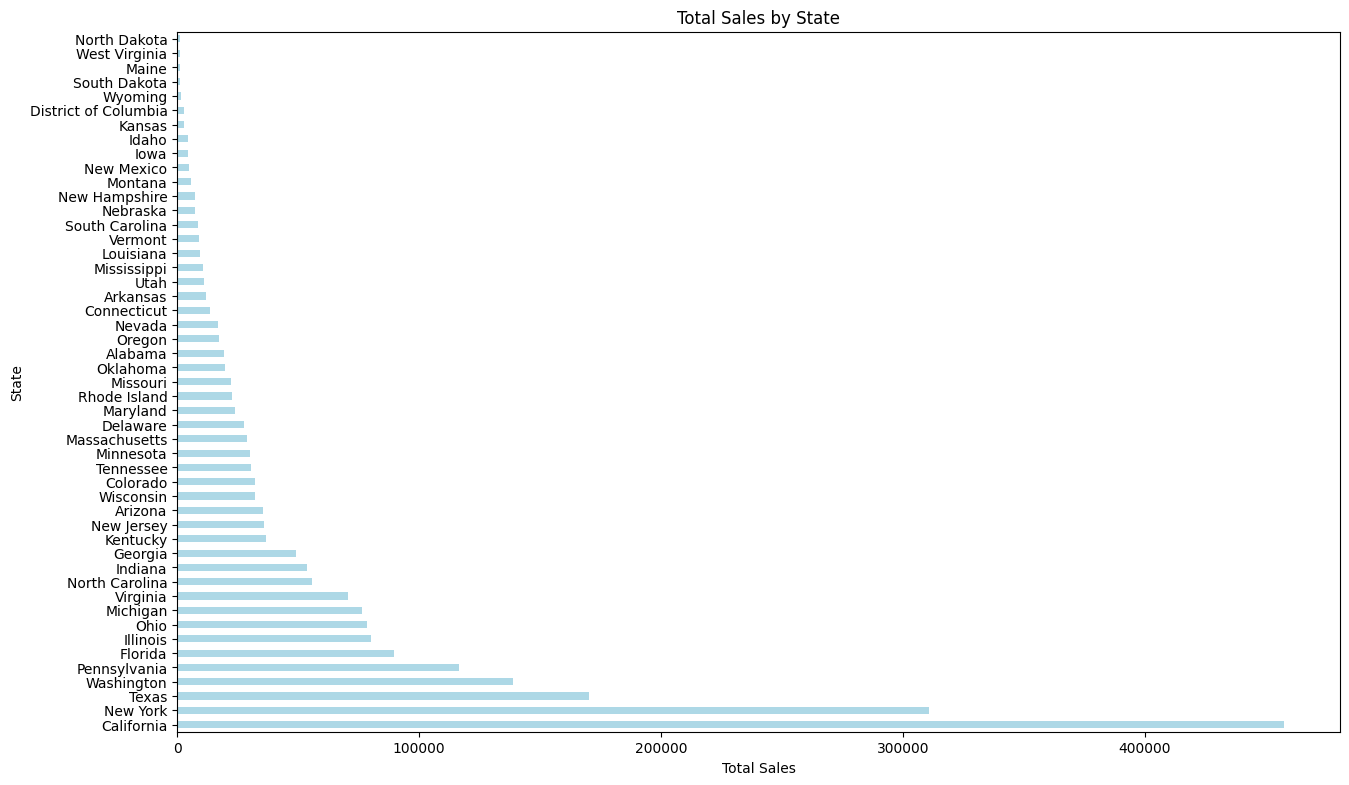

In [24]:
# Create a horizontal bar chart for total sales by state
plt.figure(figsize=(15, 20))
plt.subplot(2, 1, 1)
sales_by_state.plot(kind='barh', title='Total Sales by State', color='lightblue')
plt.ylabel('State')
plt.xlabel('Total Sales')

In [25]:
profit_by_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
profit_by_state

State
California              76381.3871
New York                74038.5486
Washington              33402.6517
Michigan                24463.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

Text(0.5, 0, 'Total Profit')

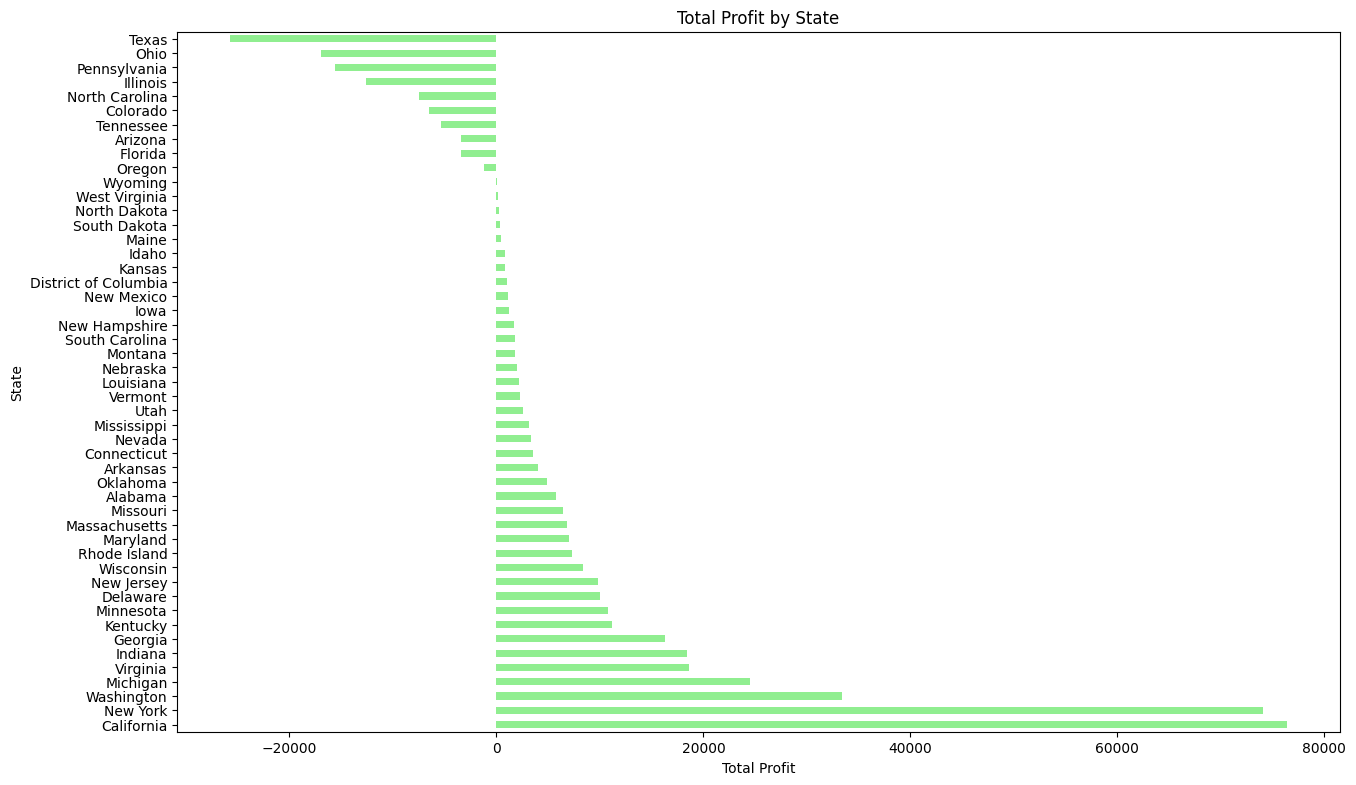

In [26]:
# Create a horizontal bar chart for total profit by state
plt.figure(figsize=(15, 20))
plt.subplot(2, 1, 2)
profit_by_state.plot(kind='barh', title='Total Profit by State', color='lightgreen')
plt.ylabel('State')
plt.xlabel('Total Profit')

The provided results show the total sales and total profit by state. Below are the figures for both sales and profit:

**Total Sales by State:**
- California: $457,687.63
- New York: $310,876.27
- Texas: $170,188.05
- Washington: $138,641.27
- Pennsylvania: $116,511.91
- Florida: $89,473.71

**Total Profit by State:**
- California: $76,381.39
- New York: $74,038.55
- Washington: $33,402.65
- Michigan: $24,463.19
- Virginia: $18,597.95
- Indiana: $18,382.94

**How it is Helpful to the Business:**

1. **Performance Assessment by State:** The analysis provides insights into the performance of the company in different states. It highlights the states where the company has the highest sales and profit figures.

2. **Resource Allocation:** The company can use this information to allocate resources effectively. It might consider investing more in marketing, operations, and customer support in states where sales and profitability are high.

3. **Market Expansion:** States with lower sales and profitability might be considered for potential market expansion efforts. The company can focus on strategies to increase its presence and profitability in these regions.

4. **Profitability Insights:** Examining profit by state reveals the states where the company is most and least profitable. This can guide pricing strategies, cost control measures, and operational improvements.

5. **Risk Mitigation:** States with lower profitability may also indicate potential risks or challenges in the market. Identifying these areas allows the company to proactively address issues and mitigate risks.

6. **Strategic Decision-Making:** The data can inform strategic decisions related to market penetration, expansion, and optimization, helping the company enhance overall performance and profitability.

In summary, this analysis of sales and profit by state helps the company assess its market presence, identify opportunities for growth, and make informed strategic decisions to maximize profitability and efficiency in various regions.

## **Analysis of Profit by Category and Sub-Category**

In [27]:
# Calculate total profit by category and sub-category
profit_by_category_subcategory = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().sort_values(ascending=False)
profit_by_category_subcategory

Category         Sub-Category
Technology       Copiers         55617.8249
                 Phones          44515.7306
                 Accessories     41936.6357
Office Supplies  Paper           34053.5693
                 Binders         30221.7633
Furniture        Chairs          26590.1663
Office Supplies  Storage         21278.8264
                 Appliances      18138.0054
Furniture        Furnishings     13059.1436
Office Supplies  Envelopes        6964.1767
                 Art              6527.7870
                 Labels           5546.2540
Technology       Machines         3384.7569
Office Supplies  Fasteners         949.5182
                 Supplies        -1189.0995
Furniture        Bookcases       -3472.5560
                 Tables         -17725.4811
Name: Profit, dtype: float64

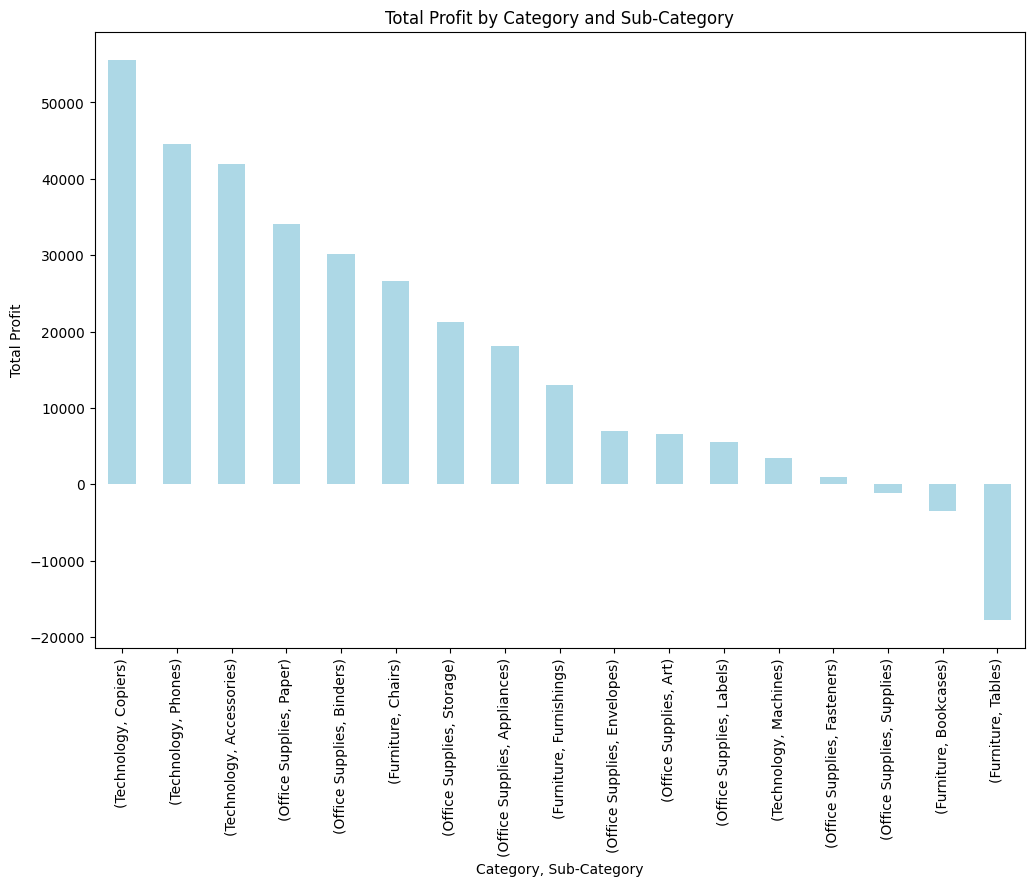

In [28]:
# Create a colorful bar chart to visualize profit by category and sub-category
plt.figure(figsize=(12, 8))
profit_by_category_subcategory.plot(kind='bar', title='Total Profit by Category and Sub-Category', color='lightblue')
plt.xlabel('Category, Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.show()

**Summary of Profitable Categories and Sub-Categories:**

1. **Technology Category:**
   - **Top Profit Makers:** Copiers, Phones, and Accessories.
   
2. **Office Supplies Category:**
   - **Profit Leaders:** Paper and Binders.
   - **Area for Improvement:** Supplies sub-category shows negative profit.

3. **Furniture Category:**
   - **Profitable Items:** Chairs and Furnishings.
   - **Challenges:** Tables and Bookcases result in losses.

**Outcomes:**

- Focus on technology products like Copiers, Phones, and Accessories as they are highly profitable.

- Optimize office supplies by emphasizing Paper and Binders while addressing issues with Supplies.

- Evaluate the cost structure of unprofitable furniture items (Tables, Bookcases).

- Continuously monitor product profitability for data-driven decision-making.

## **Sales vs. Profit Margin Analysis:**

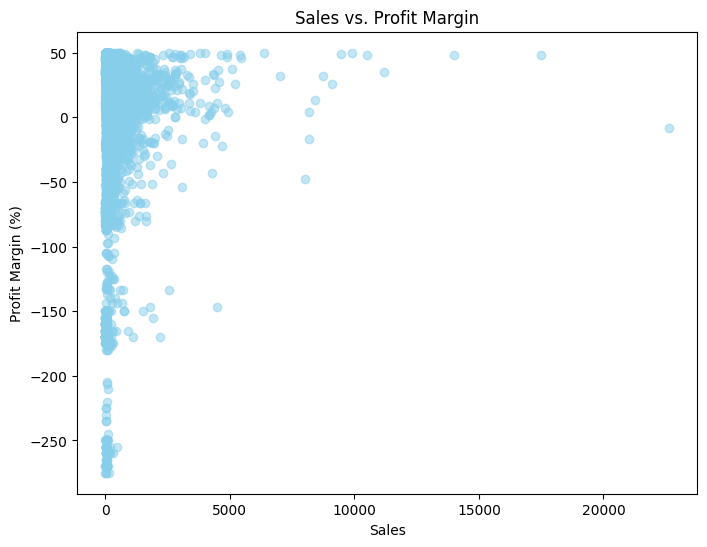

In [29]:
# Calculate profit margin for each sale
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Create a scatter plot to visualize the relationship between sales and profit margin
plt.figure(figsize=(8, 6))
plt.scatter(df['Sales'], df['Profit Margin'], alpha=0.5, color='skyblue')
plt.title('Sales vs. Profit Margin')
plt.xlabel('Sales')
plt.ylabel('Profit Margin (%)')
plt.show()


# Top Products by Sales:

In [30]:
# Identify the top products by sales
top_products_by_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(10)
top_products_by_sales

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

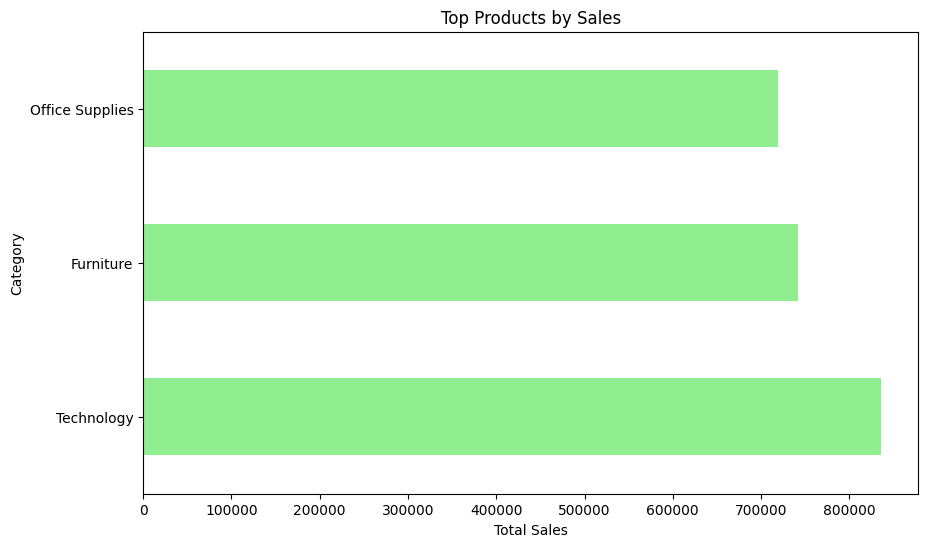

In [31]:
# Create a colorful horizontal bar chart to visualize the top products by sales
plt.figure(figsize=(10, 6))
top_products_by_sales.plot(kind='barh', title='Top Products by Sales', color='lightgreen')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()


# Discount vs. Profitability:

In [33]:
# Calculate average profit for different discount levels
profit_by_discount = df.groupby('Discount')['Profit'].mean()
profit_by_discount

Discount
0.00     66.900292
0.10     96.055074
0.15     27.288298
0.20     24.702572
0.30    -45.679636
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
0.70    -95.874060
0.80   -101.796797
Name: Profit, dtype: float64

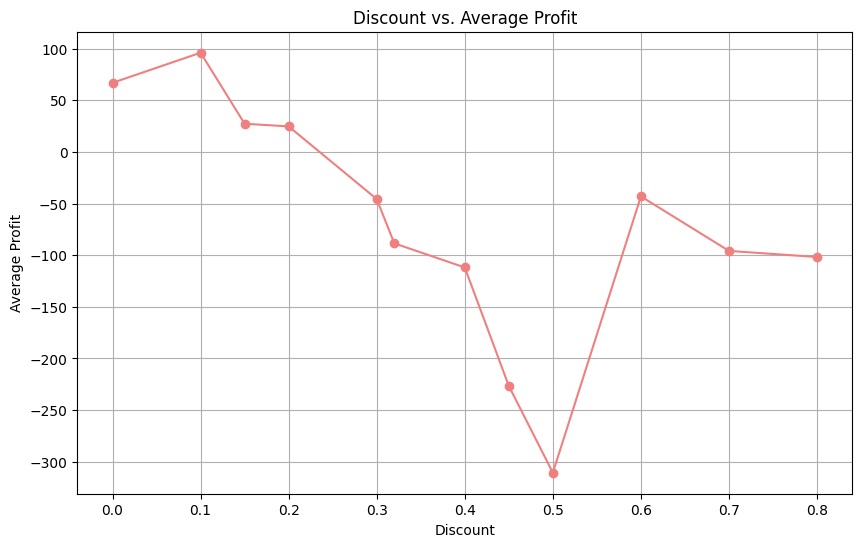

In [32]:
# Visualize the relationship between discount and profitability
plt.figure(figsize=(10, 6))
profit_by_discount.plot(kind='line', title='Discount vs. Average Profit', marker='o', color='lightcoral')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.grid()
plt.show()


# **Conclusion:**

As a business manager, the analysis of the provided dataset has revealed valuable insights that can guide decision-making and strategy formulation. Here are key takeaways and their significance:

1. **Profitable Categories and Sub-Categories:** The analysis highlighted the most profitable product categories and sub-categories. "Technology" emerged as the most profitable category, with products like Copiers, Phones, and Accessories driving high profits. In contrast, the "Supplies" sub-category within "Office Supplies" showed negative profits, indicating room for improvement.

   **Significance:** The company can focus on expanding its product offerings in the lucrative "Technology" category while addressing profitability issues in the "Supplies" sub-category. This can lead to increased overall profitability.

2. **Discount Analysis:** The impact of discounts on profit margins was examined. The data showed that offering modest discounts, such as 10% and 15%, increased average profits, while deep discounts of 45% and 50% resulted in substantial losses.

   **Significance:** The company should carefully consider its discounting strategy, balancing customer attraction with maintaining healthy profit margins. Regular monitoring of discount-performance relationships can inform pricing decisions.

3. **Sales and Profit by Segments:** The analysis by customer segments revealed that the "Consumer" segment generated the highest sales and profits. This segment-centric approach can guide marketing strategies and resource allocation.

   **Significance:** The company can invest more in marketing efforts and customer experience enhancements for the "Consumer" segment, further strengthening its profitability.

4. **Sales and Profit by State:** The analysis of sales and profit by state identified regions where the company excelled and areas with growth potential. The "West" region led in both sales and profit.

   **Significance:** The company can allocate more resources to the "West" region for expansion and optimization, maximizing profitability.

5. **Shipping Mode Analysis:** Sales and profit by shipping mode demonstrated that "Standard Class" was not only the highest in sales but also in profit. This insight informs resource allocation and customer experience improvements.

   **Significance:** The company can focus on enhancing its "Standard Class" shipping services to maintain profitability and customer satisfaction.

# Overall, these findings are invaluable for strategic planning, resource allocation, and decision-making. They empower the company to optimize its operations, expand in profitable areas, and refine its pricing and marketing strategies to achieve sustained growth and profitability. Additionally, regular monitoring of these insights will help the company adapt to changing market dynamics and customer preferences effectively.